# PROYEK DATA MINING 1
# SD - A1 / Kelompok B

ANALISIS KLASIFIKASI POLA KONSUMSI MAHASISWA TEKNOLOGI SAINS DATA UNTUK REKOMENDASI DANA USAHA


Anggota :
1. Nadila Fitri Noviardhana 164221006
2. Hanan Nabilah 164221050
3. Shiba Salsabilla 164221078
4. Salwa Sabian Raihana 164221113
5. M Asafrie Reza Arsetyo 164221121





Kami menggunakan data yang didapatkan dari penyebaran kuesioner. Data kami lampirkan pada link di bawah ini :

https://docs.google.com/spreadsheets/d/13HQzPZThGq8Vlm7k7UcKiWfns_xMAEEi/edit?usp=sharing&ouid=110451479112219017858&rtpof=true&sd=true

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

In [ ]:
df = pd.read_excel('/content/Dataset_Danus_fix.xlsx')
df

,Timestamp,Nama,Jenis_Kelamin,Umur,Sarapan,Tempat_Tinggal,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu,Preferensi_Rasa,Diet,Beli_Diluar,Pengaruh_Medsos,Preferensi_Danusan,Makanan_Diinginkan
0,2024-05-24 14:43:24.270,shiba,Perempuan,19,Tidak,Kos,2500000,2,3,Asin/gurih,Tidak,Sering,Ya,Makanan Berat,NaN
1,2024-05-24 18:01:06.393,Nadila,Perempuan,20,Tidak,Kos,1500000,3,8,Manis,Tidak,Sering,Ya,Makanan Ringan,Donat
2,2024-05-24 18:02:20.081,Au,Perempuan,19,Ya,Rumah,800000,3,5,Asin/gurih,Tidak,Sering,Ya,Makanan Ringan,Mochi
3,2024-05-24 18:07:54.327,AAAAAAA,Perempuan,21,Ya,Rumah,2000000,3,7,Pedas,Tidak,Sering,Ya,Makanan Ringan,Es wawan
4,2024-05-24 18:27:40.697,Viky,Perempuan,20,Tidak,Rumah,1250000,2,3,Manis,Tidak,Jarang,Ya,Makanan Ringan,bomboloni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-05-30 16:52:32.755,Fadhlurrahman Althaf R,Laki- laki,20,Tidak,Kos,1500000,2,3,Asin/gurih,Tidak,Sering,Tidak,Makanan Ringan,Risol
86,2024-05-30 16:55:49.609,Andre,Laki- laki,20,Ya,Rumah,2000000,3,4,Asin/gurih,Tidak,Jarang,Ya,Makanan Ringan,Roti
87,2024-05-30 17:41:47.737,Vania,Perempuan,20,Ya,Rumah,600000,2,3,Asin/gurih,Tidak,Jarang,Ya,Makanan Ringan,Seblak
88,2024-05-30 19:09:42.221,B,Perempuan,19,Ya,Kos,1200000,2,7,Asin/gurih,Tidak,Sering,Tidak,Makanan Ringan,Risol


# Data Preprocessing

In [ ]:
df.columns

Index(['Timestamp', 'Nama', 'Jenis_Kelamin', 'Umur', 'Sarapan',
       'Tempat_Tinggal', 'Uang_Saku', 'Frekuensi_makan',
       'Frekuensicemilan_Mingggu', 'Preferensi_Rasa', 'Diet', 'Beli_Diluar',
       'Pengaruh_Medsos', 'Preferensi_Danusan', 'Makanan_Diinginkan'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))

Unique values of  Nama {'Bukan Mamad', 'Vania', 'd', 'AAAAAAA', 'Rexy', 'Sel', 'Dapa', 'nala', 'Zoen', 'jihan', 'Hanan', 'rayya', 'n', 'h', 'Mulyono', 'farrel', 'Zandi', 'shiba', 'Fadhlurrahman Althaf R', 'D', 'shiqa', 'Sha', 'ARP', 'Dara', 'fabyan', 'Nadila', 'a', 'fida', 'o', 'Fadli', 'inisial', 'Tasyfia', 'dy', 'riska', 'Yan', 'Lemuel Horas', 'chd', 'Andre', 'Amira', 'Kiakub', 'Naina', 'N', 'Jovita S', 'dini', 'Romero', 'Au', 'Nafi', 'He', 'Cia', 'mm', 'Ilham Dicky Darmawan', nan, 'Billy', 'Ebay', 'Arkan', 'Viky', 'Olga ', 'mon', 'Zhiddan', 'm', 'Richo', 'Darrell', 'Nauval ', 'Fida', 'Sal', 'reza', 'wanda', 'Adam', 'Mw', 'S', 'indy', 'kohannd', 'yahya', 'sal', 'Ditha', 'H', 'sumbul', 'adan', 'B', 'ropek_', 'Kareem', 'Fikri', 'Giovanni', 'ayya', 'i', 'Farah', 'r', 'Rei', 'j'}
Unique values of  Jenis_Kelamin {'Laki- laki', 'Perempuan'}
Unique values of  Sarapan {'Ya', 'Tidak'}
Unique values of  Tempat_Tinggal {'Asrama', 'Apartemen', 'Rumah', 'Kos'}
Unique values of  Preferensi_Rasa {'

In [ ]:
df.describe(include="O").T

,count,unique,top,freq
Nama,89,88,B,2
Jenis_Kelamin,90,2,Perempuan,52
Sarapan,90,2,Ya,54
Tempat_Tinggal,90,4,Kos,58
Preferensi_Rasa,90,3,Asin/gurih,49
Diet,90,2,Tidak,83
Beli_Diluar,90,3,Sering,61
Pengaruh_Medsos,90,2,Ya,57
Preferensi_Danusan,90,2,Makanan Ringan,58
Makanan_Diinginkan,89,64,bomboloni,6


In [ ]:
print(df.dtypes)

Timestamp                   datetime64[ns]
Nama                                object
Jenis_Kelamin                       object
Umur                                 int64
Sarapan                             object
Tempat_Tinggal                      object
Uang_Saku                            int64
Frekuensi_makan                      int64
Frekuensicemilan_Mingggu             int64
Preferensi_Rasa                     object
Diet                                object
Beli_Diluar                         object
Pengaruh_Medsos                     object
Preferensi_Danusan                  object
Makanan_Diinginkan                  object
dtype: object


In [ ]:
df.drop(columns=['Timestamp', 'Nama', 'Makanan_Diinginkan'], inplace=True)

print(df.head())

  Jenis_Kelamin  Umur Sarapan Tempat_Tinggal  Uang_Saku  Frekuensi_makan  \
0     Perempuan    19   Tidak            Kos    2500000                2   
1     Perempuan    20   Tidak            Kos    1500000                3   
2     Perempuan    19      Ya          Rumah     800000                3   
3     Perempuan    21      Ya          Rumah    2000000                3   
4     Perempuan    20   Tidak          Rumah    1250000                2   

   Frekuensicemilan_Mingggu Preferensi_Rasa   Diet Beli_Diluar  \
0                         3      Asin/gurih  Tidak      Sering   
1                         8           Manis  Tidak      Sering   
2                         5      Asin/gurih  Tidak      Sering   
3                         7           Pedas  Tidak      Sering   
4                         3           Manis  Tidak      Jarang   

  Pengaruh_Medsos Preferensi_Danusan  
0              Ya      Makanan Berat  
1              Ya     Makanan Ringan  
2              Ya     Makanan

3 variabel di atas didrop karena tidak berpengaruh secara langsung dalam klasifikasi. Selain itu, juga memiliki variasi terlalu beragam.

## Missing Value

In [ ]:
df.isnull()

,Jenis_Kelamin,Umur,Sarapan,Tempat_Tinggal,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu,Preferensi_Rasa,Diet,Beli_Diluar,Pengaruh_Medsos,Preferensi_Danusan
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Jenis_Kelamin               0
Umur                        0
Sarapan                     0
Tempat_Tinggal              0
Uang_Saku                   0
Frekuensi_makan             0
Frekuensicemilan_Mingggu    0
Preferensi_Rasa             0
Diet                        0
Beli_Diluar                 0
Pengaruh_Medsos             0
Preferensi_Danusan          0
dtype: int64

Berdasarkan perhitungan diatas tidak terdapat missing value pada tiap atribut.

In [ ]:
df.head()

,Jenis_Kelamin,Umur,Sarapan,Tempat_Tinggal,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu,Preferensi_Rasa,Diet,Beli_Diluar,Pengaruh_Medsos,Preferensi_Danusan
0,Perempuan,19,Tidak,Kos,2500000,2,3,Asin/gurih,Tidak,Sering,Ya,Makanan Berat
1,Perempuan,20,Tidak,Kos,1500000,3,8,Manis,Tidak,Sering,Ya,Makanan Ringan
2,Perempuan,19,Ya,Rumah,800000,3,5,Asin/gurih,Tidak,Sering,Ya,Makanan Ringan
3,Perempuan,21,Ya,Rumah,2000000,3,7,Pedas,Tidak,Sering,Ya,Makanan Ringan
4,Perempuan,20,Tidak,Rumah,1250000,2,3,Manis,Tidak,Jarang,Ya,Makanan Ringan


##Outlier

In [ ]:
df_outliers = df.copy()

df_outliers = df_outliers.select_dtypes(include=['float', 'int'])
df_outliers

,Umur,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu
0,19,2500000,2,3
1,20,1500000,3,8
2,19,800000,3,5
3,21,2000000,3,7
4,20,1250000,2,3
...,...,...,...,...
85,20,1500000,2,3
86,20,2000000,3,4
87,20,600000,2,3
88,19,1200000,2,7


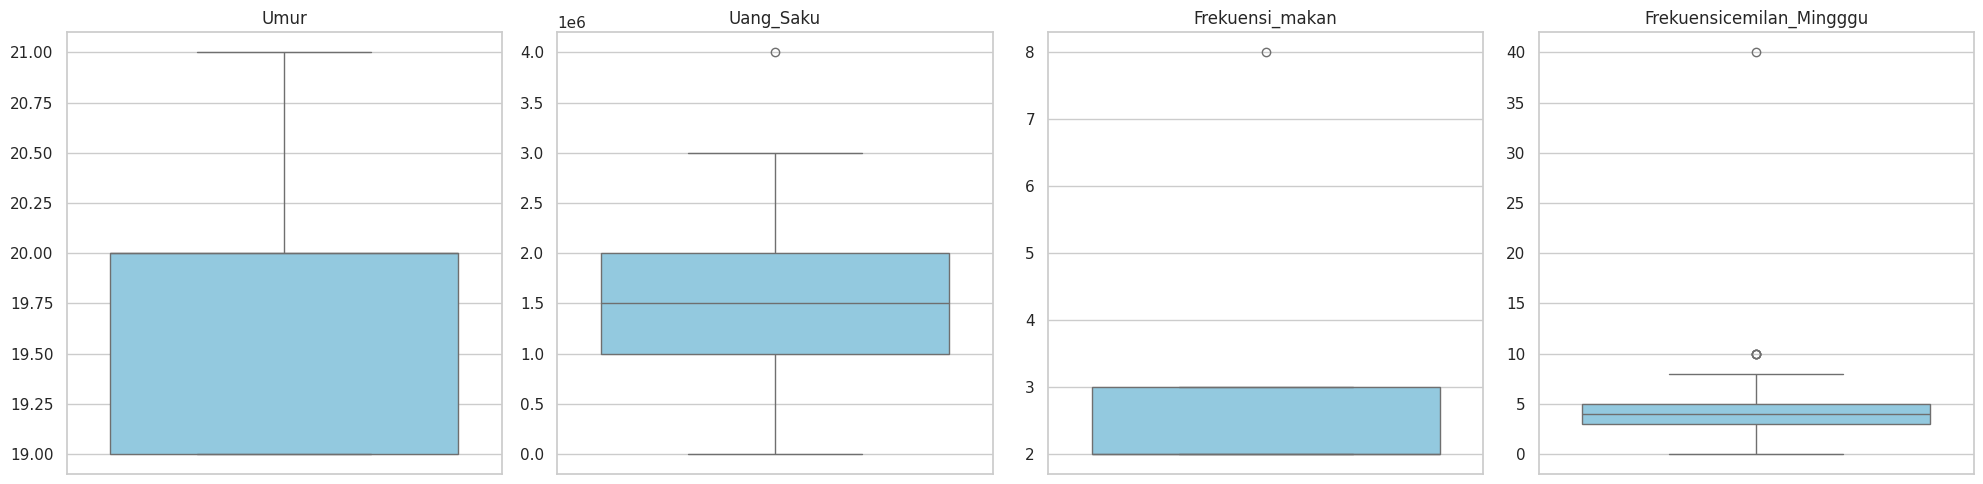

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20, 5))

for i, column in enumerate(df_outliers.columns):
    plt.subplot(1, len(df_outliers.columns), i + 1)
    sns.boxplot(y=df_outliers[column], color='skyblue')
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Outlier sangat sedikit dan merupakan bagian dari analisis jadi tidak perlu dihapus.

## Encoding

In [ ]:
df_new = df.copy()
label_encoders = {}


for column in df_new.select_dtypes(include=['object']).columns:
    if column != 'Preferensi_Danusan':
        df_new[column] = df_new[column].astype(str)
        label_encoders[column] = LabelEncoder()
        df_new[column] = label_encoders[column].fit_transform(df_new[column])

df_new

,Jenis_Kelamin,Umur,Sarapan,Tempat_Tinggal,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu,Preferensi_Rasa,Diet,Beli_Diluar,Pengaruh_Medsos,Preferensi_Danusan
0,1,19,0,2,2500000,2,3,0,0,1,1,Makanan Berat
1,1,20,0,2,1500000,3,8,1,0,1,1,Makanan Ringan
2,1,19,1,3,800000,3,5,0,0,1,1,Makanan Ringan
3,1,21,1,3,2000000,3,7,2,0,1,1,Makanan Ringan
4,1,20,0,3,1250000,2,3,1,0,0,1,Makanan Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,20,0,2,1500000,2,3,0,0,1,0,Makanan Ringan
86,0,20,1,3,2000000,3,4,0,0,0,1,Makanan Ringan
87,1,20,1,3,600000,2,3,0,0,0,1,Makanan Ringan
88,1,19,1,2,1200000,2,7,0,0,1,0,Makanan Ringan


In [ ]:
df_new["Preferensi_Danusan"] = df_new["Preferensi_Danusan"].replace({"Makanan Berat":0 ,"Makanan Ringan":1})

Encoding dilakukan untuk mengubah variabel kategorik menjadi numerik. Sesuai dengan jumlah unik atau variasi, maka variabel tersebut akan diubah.

##Normalisasi Data (MinMax Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df_new.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

df_standard_scaled = df_new.copy()
df_standard_scaled[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

print(df_standard_scaled)

    Jenis_Kelamin  Umur  Sarapan  Tempat_Tinggal  Uang_Saku  Frekuensi_makan  \
0             1.0   0.0      0.0        0.666667   0.624859         0.000000   
1             1.0   0.5      0.0        0.666667   0.374766         0.166667   
2             1.0   0.0      1.0        1.000000   0.199700         0.166667   
3             1.0   1.0      1.0        1.000000   0.499812         0.166667   
4             1.0   0.5      0.0        1.000000   0.312242         0.000000   
..            ...   ...      ...             ...        ...              ...   
85            0.0   0.5      0.0        0.666667   0.374766         0.000000   
86            0.0   0.5      1.0        1.000000   0.499812         0.166667   
87            1.0   0.5      1.0        1.000000   0.149681         0.000000   
88            1.0   0.0      1.0        0.666667   0.299737         0.000000   
89            1.0   0.5      1.0        1.000000   0.162186         0.166667   

    Frekuensicemilan_Mingggu  Preferens

Selanjutnya mengubah skala data menggunakan normalisasi minmax yakno anatara 0 dan 1. Hal ini untuk menghindari perbedaan skala data yang menyebabkan inkonsistensi ketika diaplikasikan dalam model.

# Exploratory Data Analysis

## Statistika Deskriptif

In [ ]:
df_2= pd.read_excel('/content/Dataset_Danus_fix.xlsx')
df_2.drop(columns=['Timestamp', 'Nama'], inplace=True)


In [ ]:
df_2.describe()

,Umur,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu
count,90.000000,9.000000e+01,90.000000,90.000000
mean,19.688889,1.602350e+06,2.500000,4.566667
std,0.573662,8.385233e+05,0.768041,4.269174
min,19.000000,1.500000e+03,2.000000,0.000000
25%,19.000000,1.000000e+06,2.000000,3.000000
50%,20.000000,1.500000e+06,2.000000,4.000000
75%,20.000000,2.000000e+06,3.000000,5.000000
max,21.000000,4.000000e+06,8.000000,40.000000


## Makanan yang diinginkan mahasiswa

In [ ]:
mode_value = df_2['Makanan_Diinginkan'].mode()[0]

df_2['Makanan_Diinginkan'].fillna(mode_value, inplace=True)

In [ ]:
df_2

,Jenis_Kelamin,Umur,Sarapan,Tempat_Tinggal,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu,Preferensi_Rasa,Diet,Beli_Diluar,Pengaruh_Medsos,Preferensi_Danusan,Makanan_Diinginkan
0,Perempuan,19,Tidak,Kos,2500000,2,3,Asin/gurih,Tidak,Sering,Ya,Makanan Berat,bomboloni
1,Perempuan,20,Tidak,Kos,1500000,3,8,Manis,Tidak,Sering,Ya,Makanan Ringan,Donat
2,Perempuan,19,Ya,Rumah,800000,3,5,Asin/gurih,Tidak,Sering,Ya,Makanan Ringan,Mochi
3,Perempuan,21,Ya,Rumah,2000000,3,7,Pedas,Tidak,Sering,Ya,Makanan Ringan,Es wawan
4,Perempuan,20,Tidak,Rumah,1250000,2,3,Manis,Tidak,Jarang,Ya,Makanan Ringan,bomboloni
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Laki- laki,20,Tidak,Kos,1500000,2,3,Asin/gurih,Tidak,Sering,Tidak,Makanan Ringan,Risol
86,Laki- laki,20,Ya,Rumah,2000000,3,4,Asin/gurih,Tidak,Jarang,Ya,Makanan Ringan,Roti
87,Perempuan,20,Ya,Rumah,600000,2,3,Asin/gurih,Tidak,Jarang,Ya,Makanan Ringan,Seblak
88,Perempuan,19,Ya,Kos,1200000,2,7,Asin/gurih,Tidak,Sering,Tidak,Makanan Ringan,Risol


In [ ]:
mapping = {
    'risma': 'risol mayo',
    'risol' : 'risol mayo',
    'nasi yang lengkap (ada protein ayam/daging': 'nasi campur',
    'salmon sushi' : 'sushi',
    'dimsum mentai': 'dimsum',
    'nasi ayam joder' : 'joder',
    'ya gatau kok nanya saya' : 'bomboloni',
    'risol 😋': 'risol mayo',
    'sushi tei' : 'sushi',
    'bombo' : 'bomboloni',
    'takso' : 'bakso',
    'mcd': 'fastfood',
    'burger' : 'fastfood',
    'pizza': 'fastfood',
    'nasi padang udawandi': 'nasi padang',
    'ayam' : 'nasi ayam',
    'nasi ayam goreng ciput' : 'nasi ayam',
    'nasi' : 'nasi ayam'
}

def transform_value(val):
    if isinstance(val, str):
      for v in val.split(','):
        value = v.strip()
        val_lower = value.lower()
        return mapping.get(val_lower, val_lower)
    return val

fast food : mcd, burger, pizza

In [ ]:
df_2['Makanan_Diinginkan'] = df_2['Makanan_Diinginkan'].apply(transform_value)
frekuensi = df_2['Makanan_Diinginkan'].value_counts()
frekuensi

Makanan_Diinginkan
bomboloni               15
risol mayo               9
mochi                    5
dimsum                   5
joder                    4
tahu bakso               4
nasi goreng              3
nasi ayam                3
fastfood                 3
nasi padang              2
onigiri                  2
sushi                    2
lobster                  2
rice bowl                1
masakan ibu              1
kopi                     1
mie                      1
steak                    1
pisang coklat            1
cheesecake               1
pop mie                  1
penyetan lele goreng     1
churros                  1
roti                     1
bakso                    1
souffle pancake          1
nasi bakar               1
toppoki                  1
nasi kuning              1
wonton                   1
strudel                  1
donat                    1
sosis                    1
mixue                    1
nasi campur              1
pempek                   1
fruit san

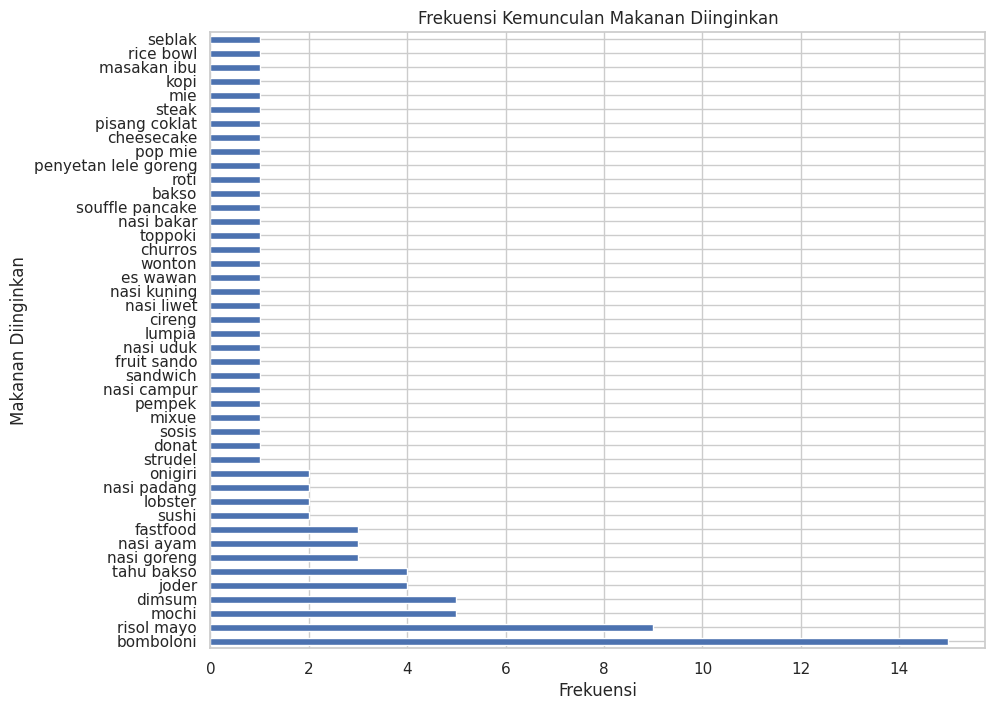

In [ ]:
frekuensi = frekuensi.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
frekuensi.plot(kind='barh')
plt.xlabel('Frekuensi')
plt.ylabel('Makanan Diinginkan')
plt.title('Frekuensi Kemunculan Makanan Diinginkan')
plt.show()

Pada variabel 'Makanan_Diinginkan', dilakukan proses mapping terlebih dahulu untuk memastikan konsistensi penulisan nama makanan. Contohnya, terdapat kata yang sama tetapi dengan cara penulisan yang berbeda seperti 'Risol Mayo' dan 'Risma', maka akan dimapping menjadi 'risol mayo'. Selain itu, juga dibuat fungsi 'transform_value' untuk mengubah semua huruf tiap nilai yang ada menjadi huruf kecil. Sehingga, setiap variasi penulisan akan distandarkan, dan nilai data makanan yang diinginkan oleh mahasiswa di danusan menjadi lebih mudah untuk dihitung.

## Heatmap Correlation

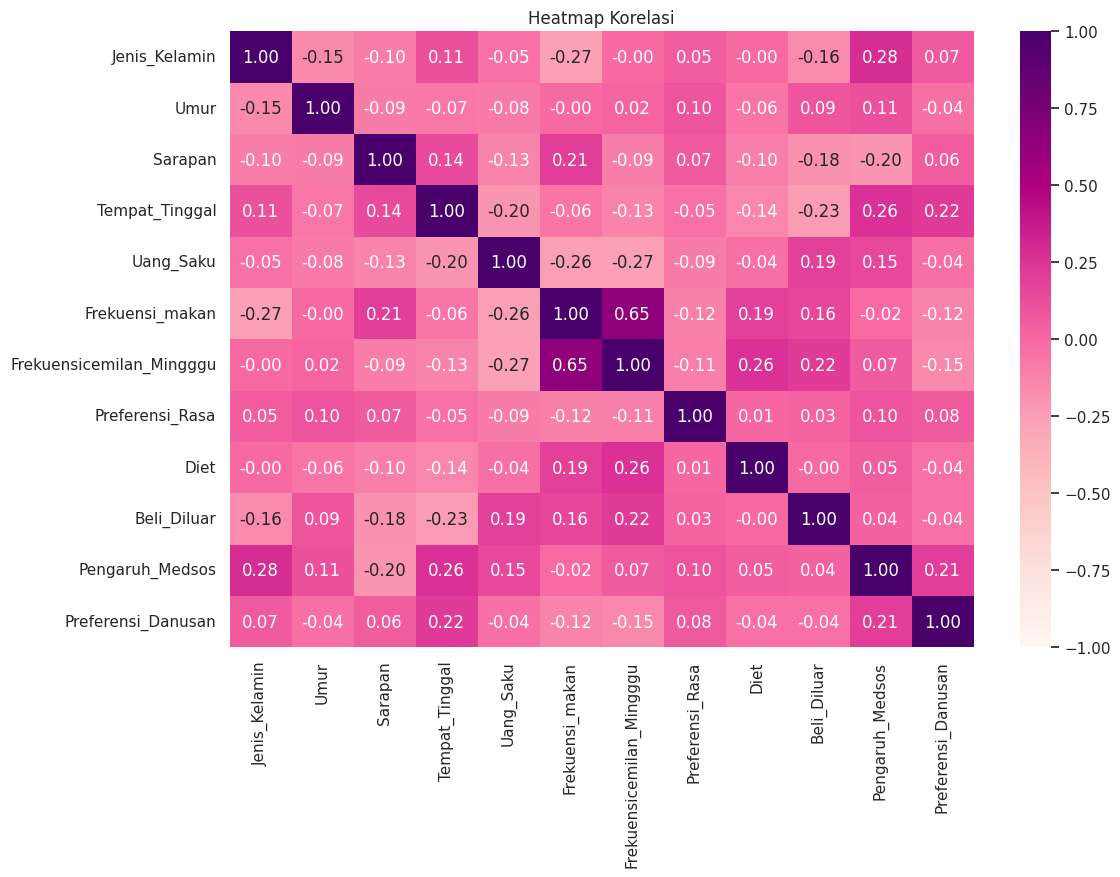

In [ ]:
corr_matrix = df_new.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pie_bar_plot(df, col, attrition_col):
    plt.figure(figsize=(18, 6))

    value_counts = df[col].value_counts().sort_index()

    plt.subplot(1, 3, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="bold", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    plt.subplot(1, 3, 2)
    value_1 = value_counts
    value_yes = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()
    ax2 = np.floor((value_yes / value_1) * 100).values
    sns.barplot(x=value_yes.index, y=value_yes.values, palette='Set2')
    plt.title(f"Makanan Ringan by {col}", fontweight="bold", size=14, pad=15)

    for index, value in enumerate(value_yes):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.subplot(1, 3, 3)
    value_no = df[df['attrition_label'] == 'No'][col].value_counts().sort_index()
    ax3 = np.floor((value_no / value_1) * 100).values
    sns.barplot(x=value_no.index, y=value_no.values, palette='Set2')
    plt.title(f"Makanan Berat by {col}", fontweight="bold", size=14, pad=15)

    for index, value in enumerate(value_no):
        plt.text(index, value, str(value) + " (" + str(int(ax3[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

def hist_with_hue(df, col, attrition_col):
    plt.figure(figsize=(18, 6))

    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    plt.subplot(1, 3, 1)
    sns.histplot(x=col, hue='attrition_label', data=df, kde=True, palette='Set2')

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, ha='center')

    plt.title(f"Distribution by {col}", fontweight="bold", size=14, pad=10)

    plt.subplot(1, 3, 2)
    sns.boxplot(x='attrition_label', y=col, data=df[df['attrition_label'] == 'Yes'], palette='Set2')
    plt.title(f"Makanan Ringan by {col}", fontweight="bold", size=14, pad=10)

    plt.subplot(1, 3, 3)
    sns.boxplot(x='attrition_label', y=col, data=df[df['attrition_label'] == 'No'], palette='Set2')
    plt.title(f"Makanan Berat by {col}", fontweight="bold", size=14, pad=10)

    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def count_percent_plot(df, col, attrition_col):
    plt.figure(figsize=(18, 6))

    value_counts = df[col].value_counts().sort_index()

    plt.subplot(1, 3, 1)
    ax1 = value_counts
    sns.barplot(x=ax1.index, y=ax1.values, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="bold", size=14, pad=15)
    for index, value in enumerate(ax1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    plt.subplot(1, 3, 2)
    value_yes = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()
    attrition_yes_rate = (value_yes / value_counts * 100).values
    sns.barplot(x=value_yes.index, y=value_yes.values, palette='Set2')
    plt.title(f"Makanan Ringan by {col}", fontweight="bold", size=14, pad=15)
    for index, value in enumerate(value_yes.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_yes_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    plt.subplot(1, 3, 3)
    value_no = df[df['attrition_label'] == 'No'][col].value_counts().sort_index()
    attrition_no_rate = (value_no / value_counts * 100).values
    sns.barplot(x=value_no.index, y=value_no.values, palette='Set2')
    plt.title(f"Makanan Berat by by {col}", fontweight="bold", size=14, pad=15)
    for index, value in enumerate(value_no.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_no_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
df_eda = df.copy()
df_eda["Preferensi_Danusan"] = df_eda["Preferensi_Danusan"].replace({"Makanan Berat":0 ,"Makanan Ringan":1})

In [ ]:
df_eda

,Jenis_Kelamin,Umur,Sarapan,Tempat_Tinggal,Uang_Saku,Frekuensi_makan,Frekuensicemilan_Mingggu,Preferensi_Rasa,Diet,Beli_Diluar,Pengaruh_Medsos,Preferensi_Danusan
0,Perempuan,19,Tidak,Kos,2500000,2,3,Asin/gurih,Tidak,Sering,Ya,0
1,Perempuan,20,Tidak,Kos,1500000,3,8,Manis,Tidak,Sering,Ya,1
2,Perempuan,19,Ya,Rumah,800000,3,5,Asin/gurih,Tidak,Sering,Ya,1
3,Perempuan,21,Ya,Rumah,2000000,3,7,Pedas,Tidak,Sering,Ya,1
4,Perempuan,20,Tidak,Rumah,1250000,2,3,Manis,Tidak,Jarang,Ya,1
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Laki- laki,20,Tidak,Kos,1500000,2,3,Asin/gurih,Tidak,Sering,Tidak,1
86,Laki- laki,20,Ya,Rumah,2000000,3,4,Asin/gurih,Tidak,Jarang,Ya,1
87,Perempuan,20,Ya,Rumah,600000,2,3,Asin/gurih,Tidak,Jarang,Ya,1
88,Perempuan,19,Ya,Kos,1200000,2,7,Asin/gurih,Tidak,Sering,Tidak,1


## Histogram

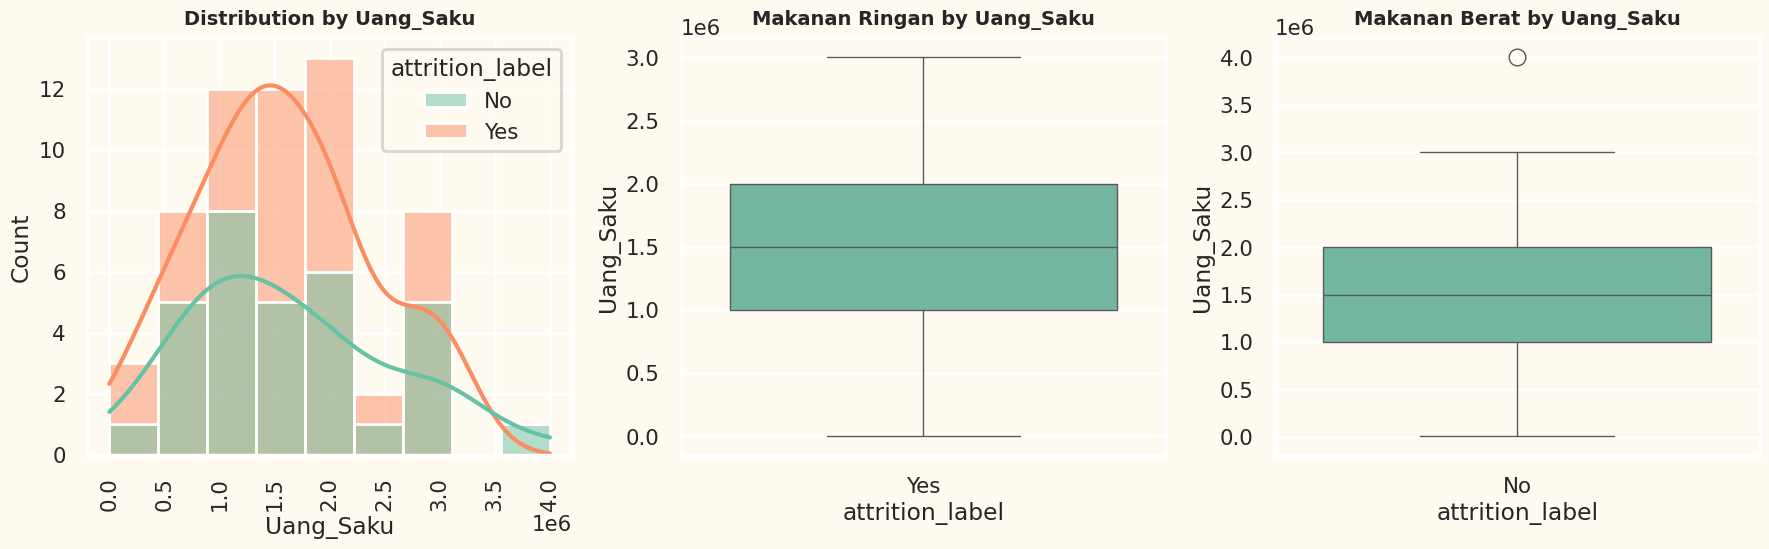

In [ ]:
hist_with_hue(df_eda, "Uang_Saku", "Preferensi_Danusan")

**Interpretasi**:
* Mayoritas uang saku berada di angka 1-2 juta rupiah
* Mahasiswa dengan uang saku di atas 2 juta rupiah sangat kecil dibanding dibawah 2 juta

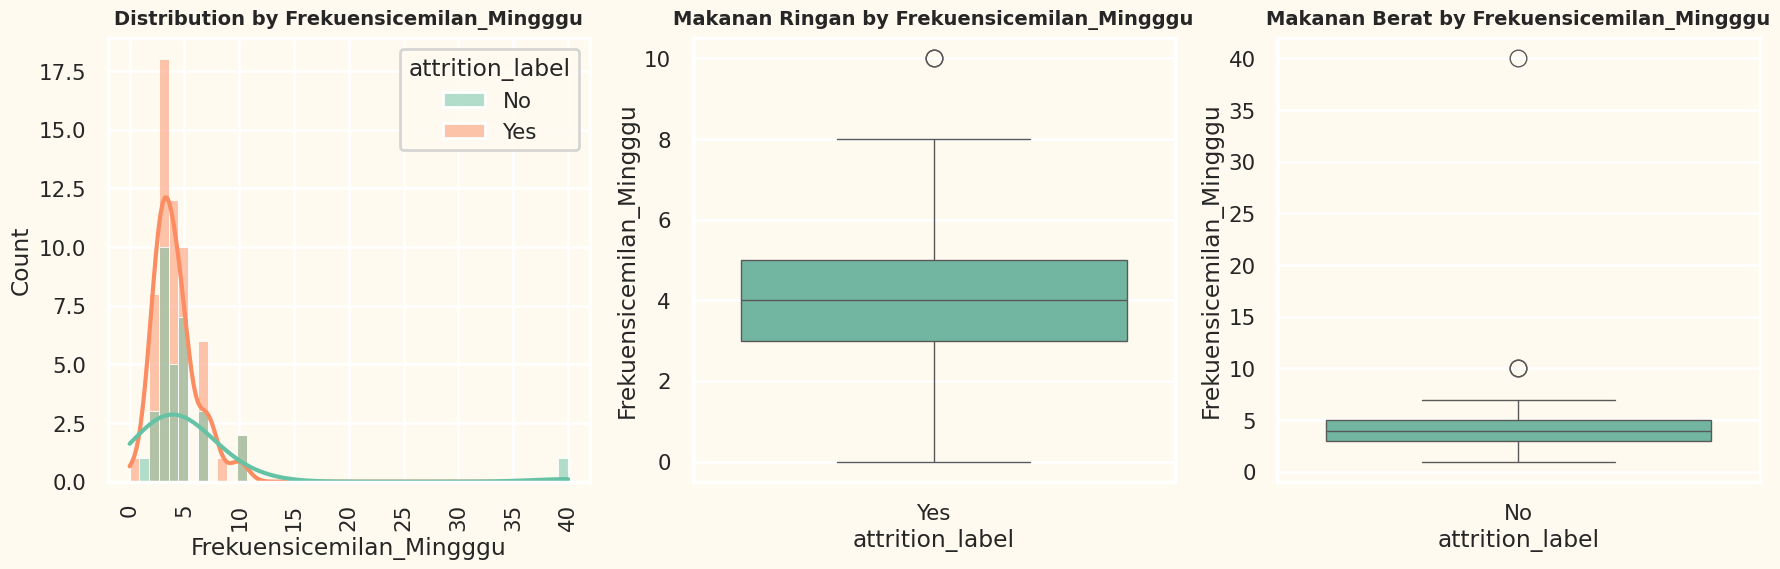

In [ ]:
hist_with_hue(df_eda, "Frekuensicemilan_Mingggu", "Preferensi_Danusan")

**Interpretasi**
* Mahasiswa memakan cemilan dalam seminggu sebanyak 3-5 kali.
* Rata-rata mahasiswa yang memilih makanan ringan dan makanan berat tidak berbeda signifikan, yaitu memakan cemilan 4 kali dalam seminggu.

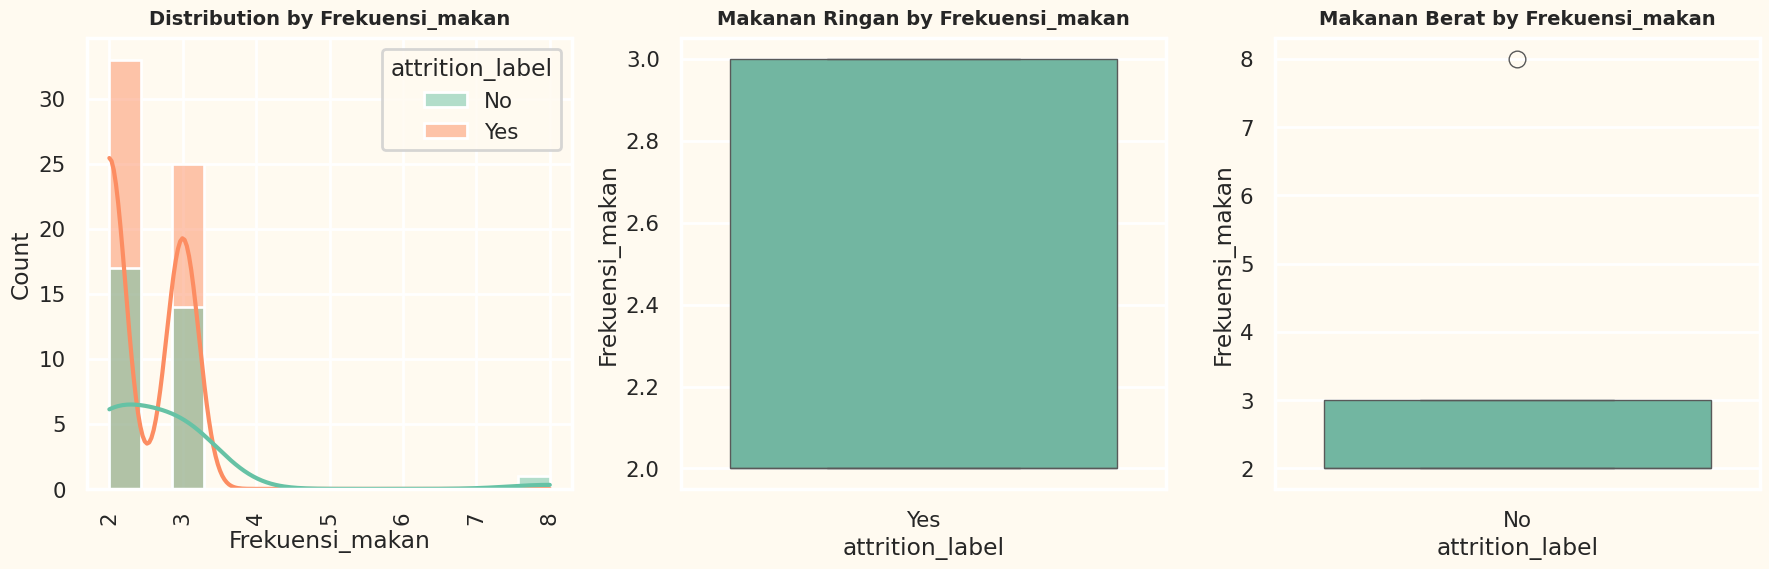

In [ ]:
hist_with_hue(df_eda,'Frekuensi_makan', 'Preferensi_Danusan')

**Interpretasi:**
* Distribusi miring ke kanan atau right skewed.
* Mayoritas mahasiwa makan sebanyak 2-3 kali sehari, namun ditemukan juga mahasiswa yang makan sebanyak 8 kali sehari


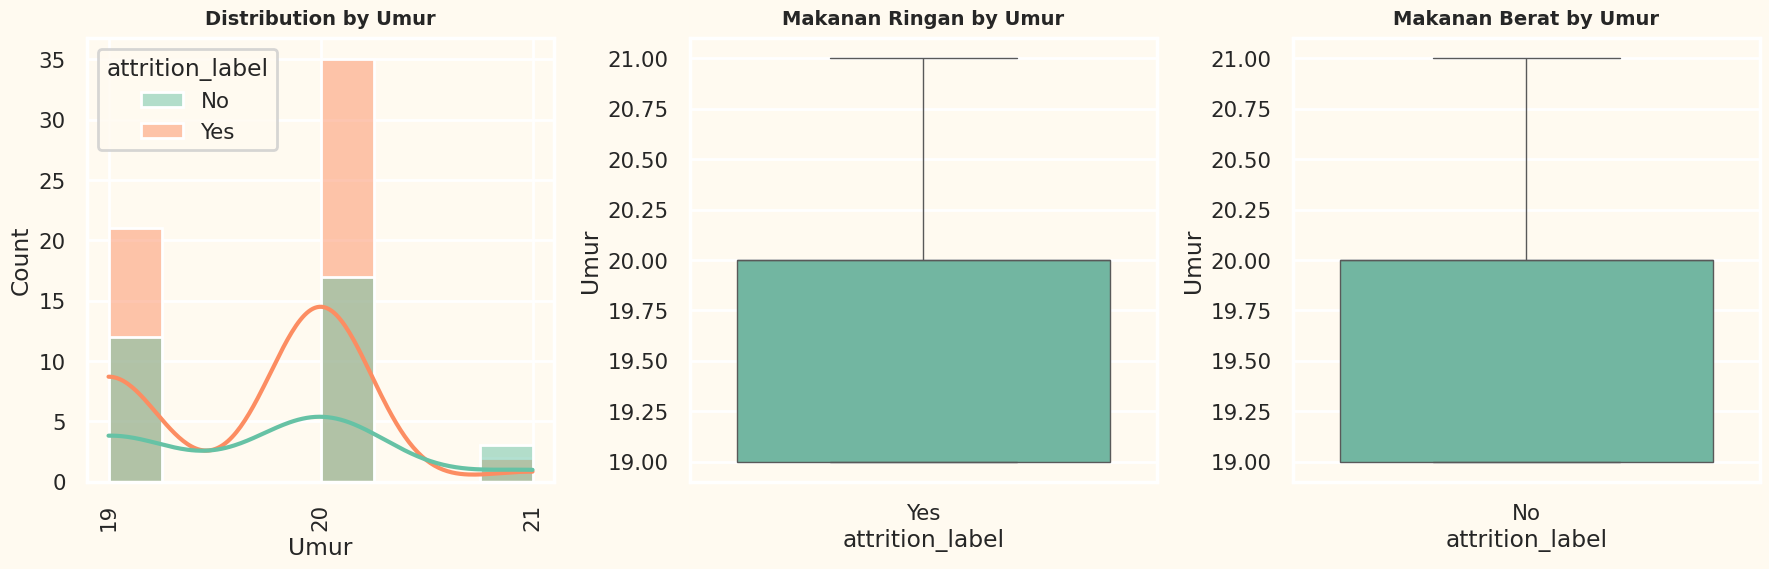

In [ ]:
hist_with_hue(df_eda, 'Umur', 'Preferensi_Danusan')

**Interpretasi**
* Mahasiswa TSD angkatan 2022 yang mengisi kuesioner mayoritas berumur 20 tahun (57,8%), kemudian mahasiswa berumur 19 tahun (36,7%), dan minoritas mahasiswa berumur 21 tahun (5,6%)
* Makanan Ringan mayoritas dipilih oleh mahasiswa berumur 20 tahun, begitu pun makanan berat.

## Bar Chart

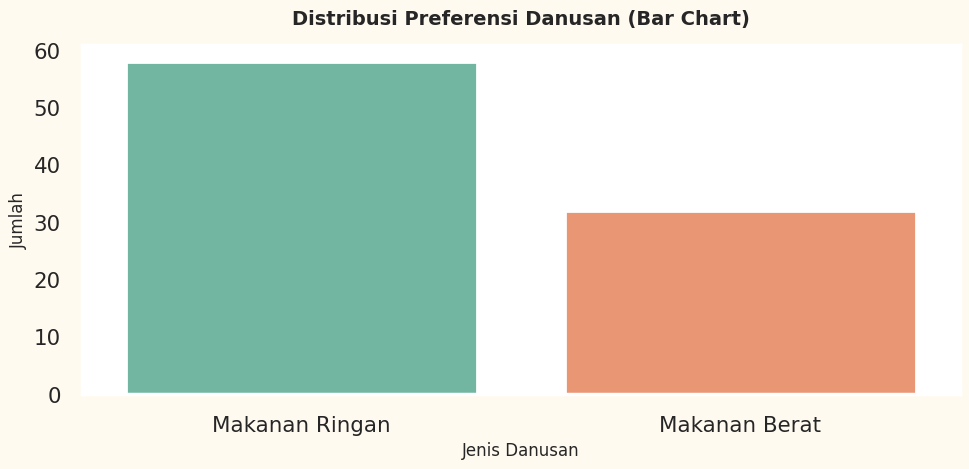

In [ ]:
value_counts = df['Preferensi_Danusan'].value_counts()

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
plt.title("Distribusi Preferensi Danusan (Bar Chart)", fontweight="bold", size=14, pad=15)
sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2', ax=ax)

ax.set_facecolor('white')

ax.set_xlabel('Jenis Danusan', fontsize=12)
ax.set_ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()


**INterpretasi:**
* Mayoritas lebih dari 50 individu memilih makanan ringan sebagai makanan yang ingin dijual di danusan

## Pie Chart

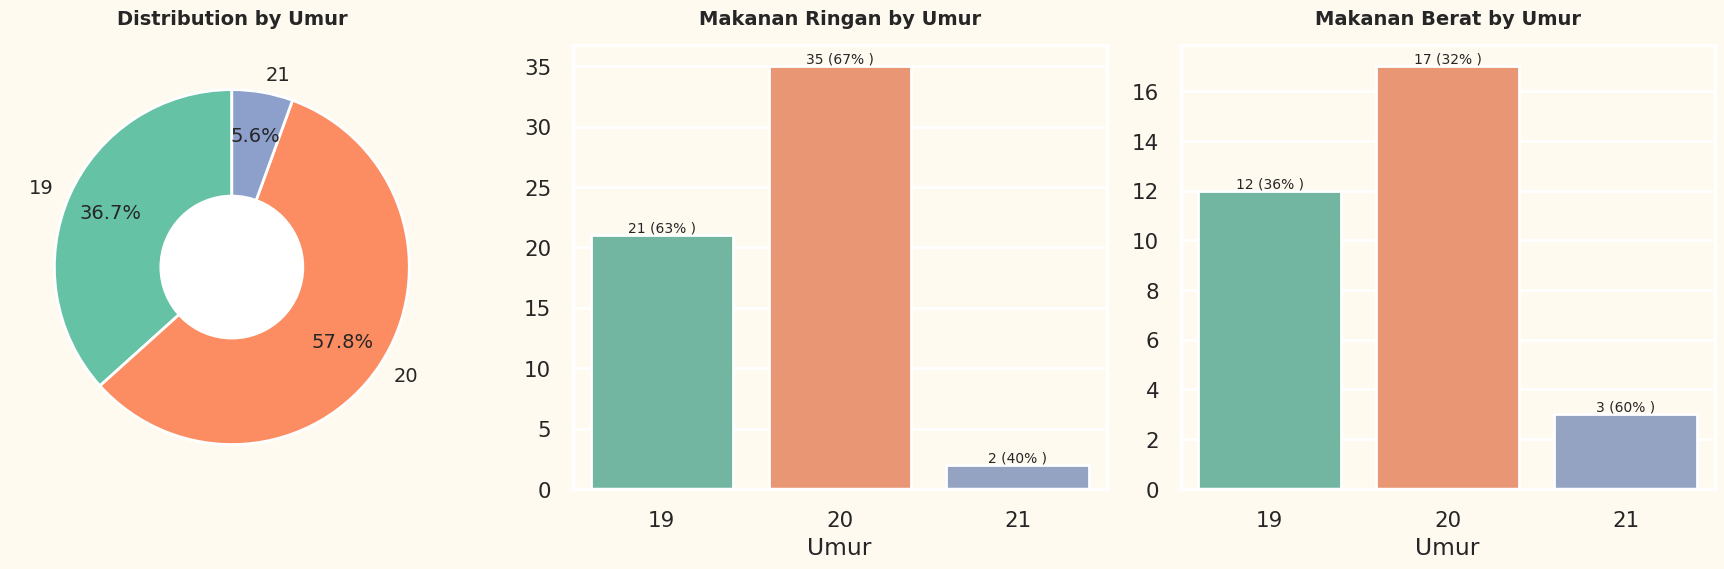

In [ ]:
pie_bar_plot(df_eda, 'Umur', 'Preferensi_Danusan')

**Interpretasi**
* Mahasiswa TSD angkatan 2022 yang mengisi kuesioner mayoritas berumur 20 tahun (57,8%), kemudian mahasiswa berumur 19 tahun (36,7%), dan minoritas mahasiswa berumur 21 tahun (5,6%)
* Makanan Ringan mayoritas dipilih oleh mahasiswa berumur 20 tahun, begitu pun makanan berat.

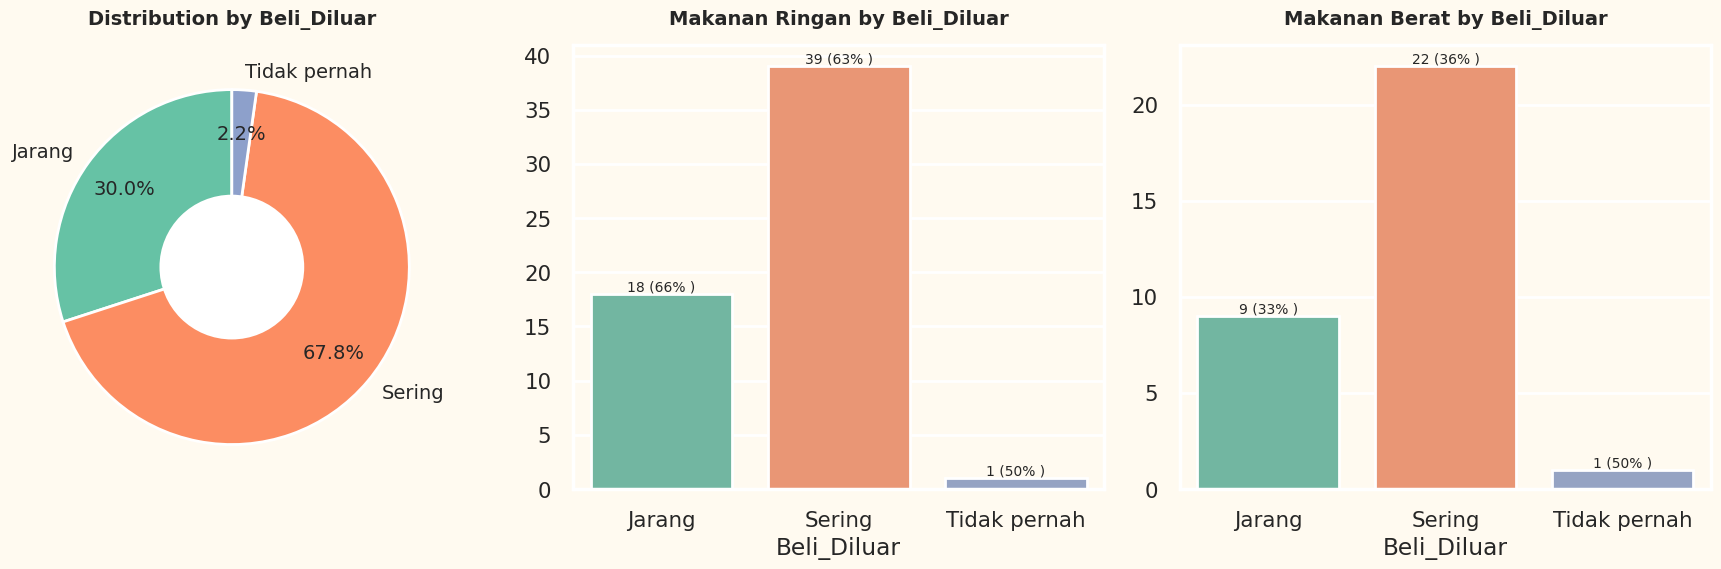

In [ ]:
pie_bar_plot(df_eda, "Beli_Diluar", "Preferensi_Danusan")

**Interpretasi**:
* Mahasiswa TSD angkatan 2022 paling sering membeli makanan di luar.
* Mahasiswa yang sering membeli makanan di luar lebih memilih membeli makanan ringan di danusan, terbukti sebanyak 39 responden, dan yang memilih makanan beratr hanya 22 orang.



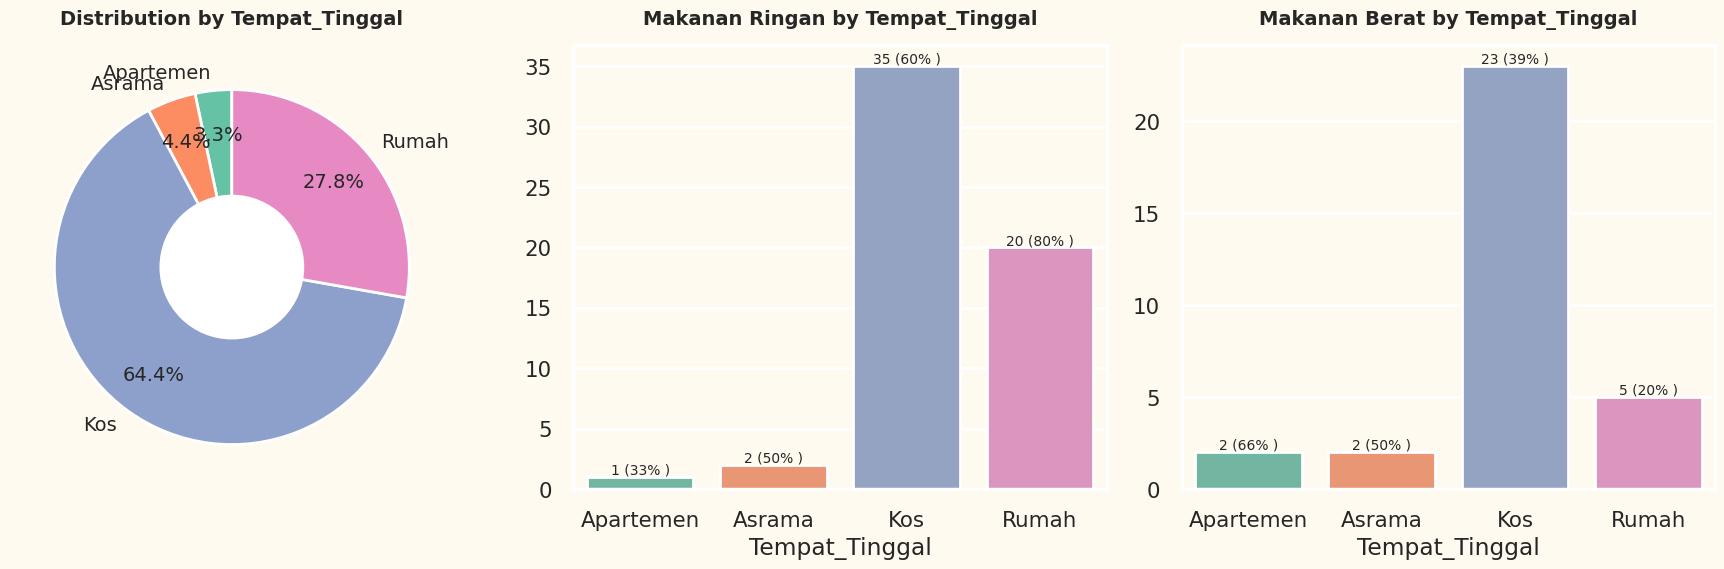

In [ ]:
pie_bar_plot(df_eda, 'Tempat_Tinggal', 'Preferensi_Danusan')

**Interpretasi:**
* Mahasiswa TSD angkatan 2022 mayoritas bertempat tinggal di kost dengan persentase sebesar 64,4%, kemudian disusul oleh mahasiswa yang bertempat tinggal di rumah 27,8%. Sedangkan mahasiswa yang tinggal di asrama dan apartemen menjadi responden paling sedikit, dengan persentase sebesar 4,4% dan 3.3%.
* Mahasiswa yang tinggal di apartemen lebih banyak yang memilih makanan berat.
* Mahasiswa yang tinggal di asrama sama banyaknya antara yang memilih makanan ringan dan makanan berat.
* Mahasiswa yang tinggal di kos lebih banyak yang memilih makanan ringan.
* Mahasiswa yang tinggal di rumah lebih banyak yang memilih makanan ringan.

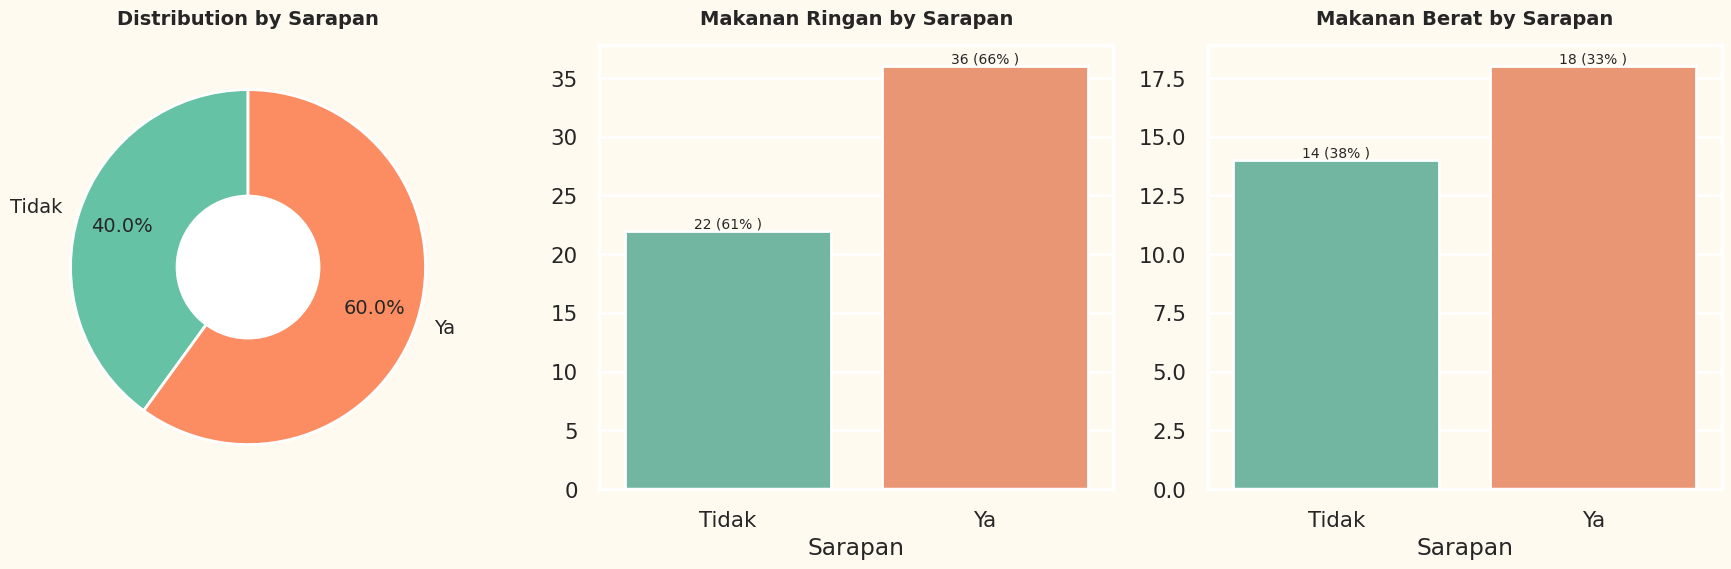

In [ ]:
pie_bar_plot(df_eda, 'Sarapan', 'Preferensi_Danusan')

**Interpretasi:**
* Mahasiswa TSD 22 mayoritas 60% sarapan.
* Mahasiswa yang sarapan lebih banyak memilih makanan ringan, begitu pula mahasiswa yang tidak sarapan.

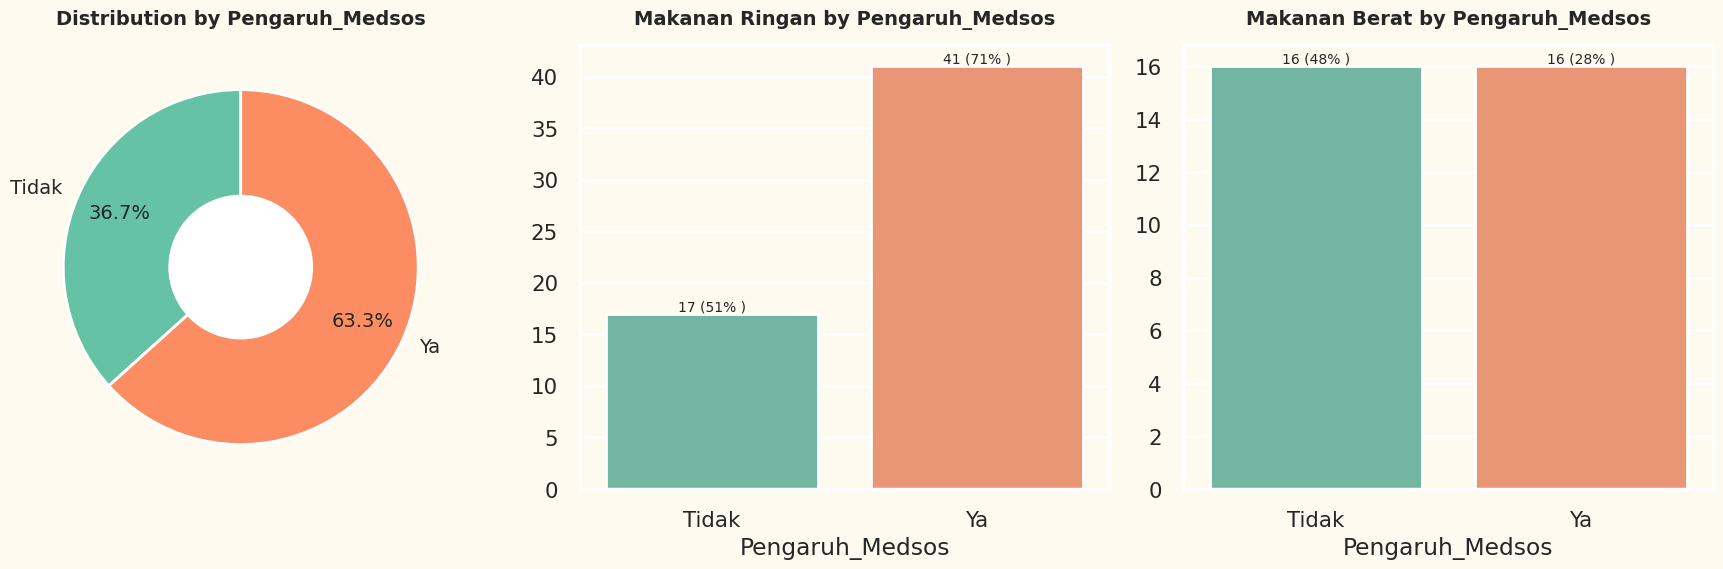

In [ ]:
pie_bar_plot(df_eda, "Pengaruh_Medsos", "Preferensi_Danusan")

**Interpretasi:**
* Mahasiswa TSD 22 mayoritas 63.3% membeli makanan berdasarkan preferensi dari media sosial yang mereka lihat.
* Mahasiswa yang dipengaruhi media sosial
* Mahasiswa yang dipengaruhi dan tidak dipengaruhi media sosial sama banyaknya memilih makanan berat.


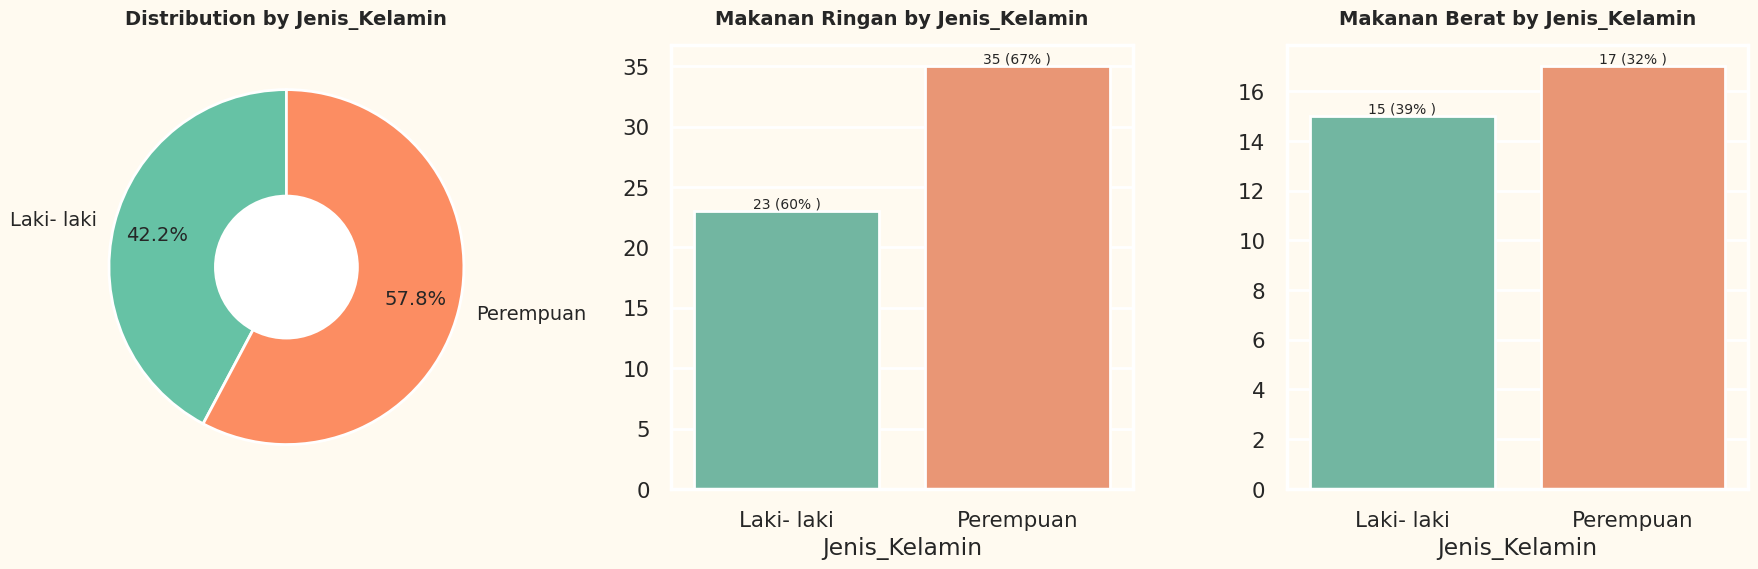

In [ ]:
pie_bar_plot(df_eda, "Jenis_Kelamin", "Preferensi_Danusan")

**Interpretasi:**
* Mahasiswa TSD 22 mayoritas 57,8% berjenis kelamin perempuan.
* Kedua jenis kelamin lebih banyak memilih makanan ringan.

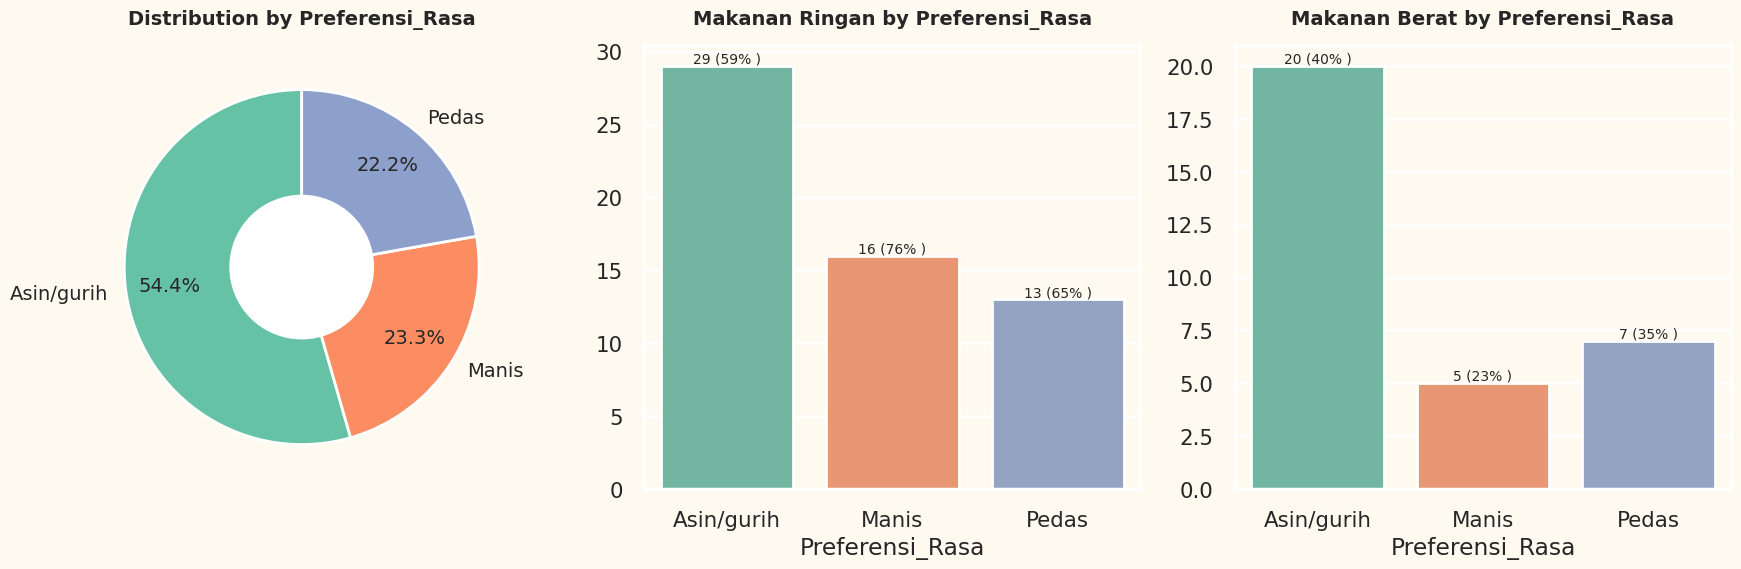

In [ ]:
pie_bar_plot(df_eda, 'Preferensi_Rasa', 'Preferensi_Danusan')

**Interpretasi:**
* Mahasiswa TSD 22 mayoritas 54,4% memilih makanan yang memiliki rasa asin/gurih. Sedangkan yang memilih rasa pedas dan manis tidak memiliki perbedaan yang signifikan, yaitu 22,2%^ dan 23,3%.
* Mahasiswa yang memilih rasa asin mayoritas memilih makanan ringanBINGUNG

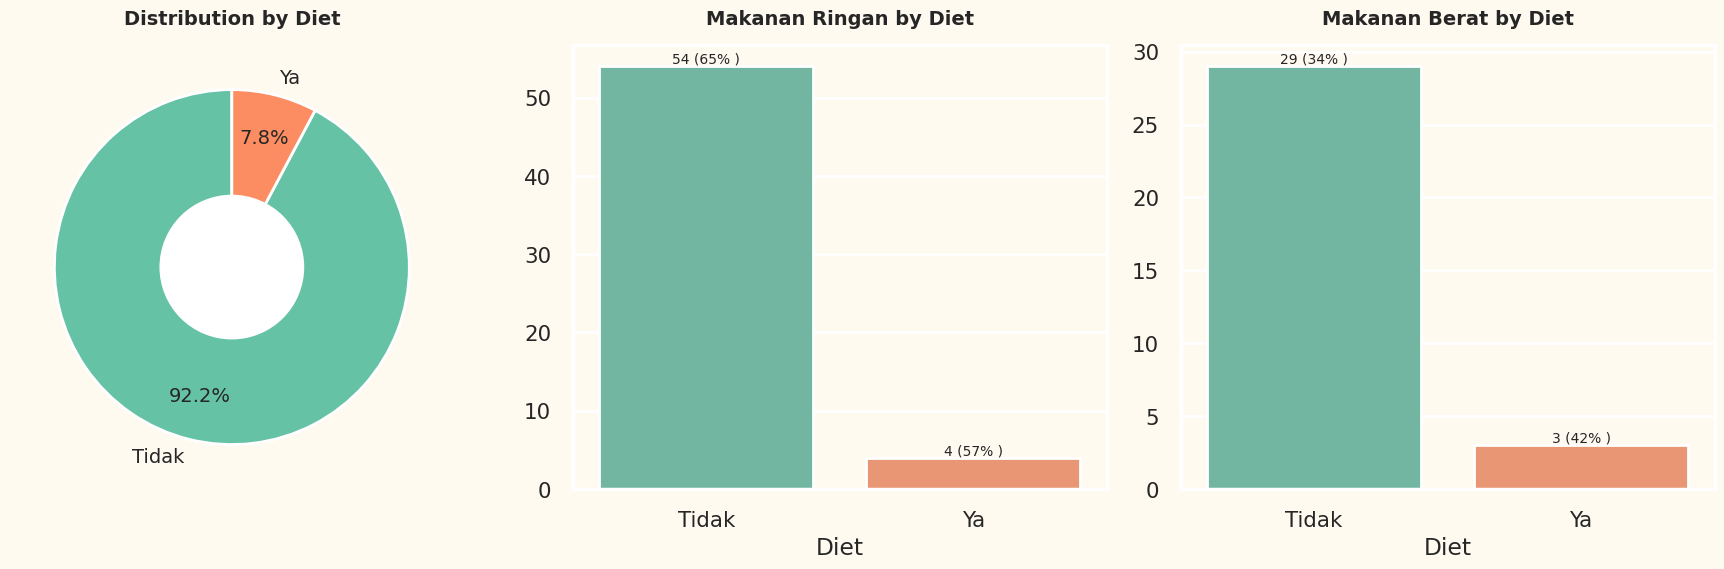

In [ ]:
pie_bar_plot(df_eda, 'Diet', 'Preferensi_Danusan')

**Interpretasi:**
* Mayoritas 92,2% mahasiswa TSD22 tidak sedang dalam program diet, sedangkan 7,8% lainnya sedang program diet.
* Mahasiswa yang tidak diet dan sedang diet lebih banyak memilih makanan ringan dari pada makanan berat.


# Splitting and Checking Imbalanced Data

In [ ]:
X = df_standard_scaled.drop(['Preferensi_Danusan'], axis=1)
y = df_standard_scaled['Preferensi_Danusan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

Melakuakan splitting data dengan proporsi 30 persen data testing dan 70 persen data training.

In [ ]:
X_train.shape, X_test.shape

((63, 11), (27, 11))

In [ ]:
y_train.shape, y_test.shape

((63,), (27,))

In [ ]:
percentage_values_train = y_train.value_counts(normalize=True) * 100

percentage_values_test = y_test.value_counts(normalize=True) * 100

print("Persentase nilai dalam variabel kategorik (y_train):")
print(percentage_values_train)

print("\nPersentase nilai dalam variabel kategorik (y_test):")
print(percentage_values_test)

Persentase nilai dalam variabel kategorik (y_train):
Preferensi_Danusan
1.0    65.079365
0.0    34.920635
Name: proportion, dtype: float64

Persentase nilai dalam variabel kategorik (y_test):
Preferensi_Danusan
1.0    62.962963
0.0    37.037037
Name: proportion, dtype: float64


Mengetahui imbalanced data dengan perbandingan 65 %, 35%. Maka perlu dilakukan proses resampling.

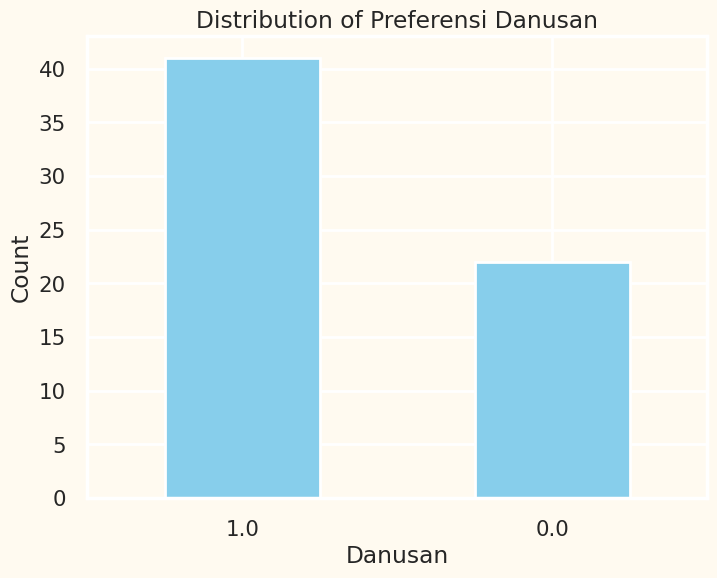

Danus Counts:
Preferensi_Danusan
1.0    41
0.0    22
Name: count, dtype: int64


In [ ]:
Danus_counts = y_train.value_counts()

plt.figure(figsize=(8, 6))
Danus_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Preferensi Danusan')
plt.xlabel('Danusan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Danus Counts:")
print(Danus_counts)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(len(X_train_smote), len(y_train_smote))

82 82


Setelah dilakukan resampling, maka data sudah seimbang.

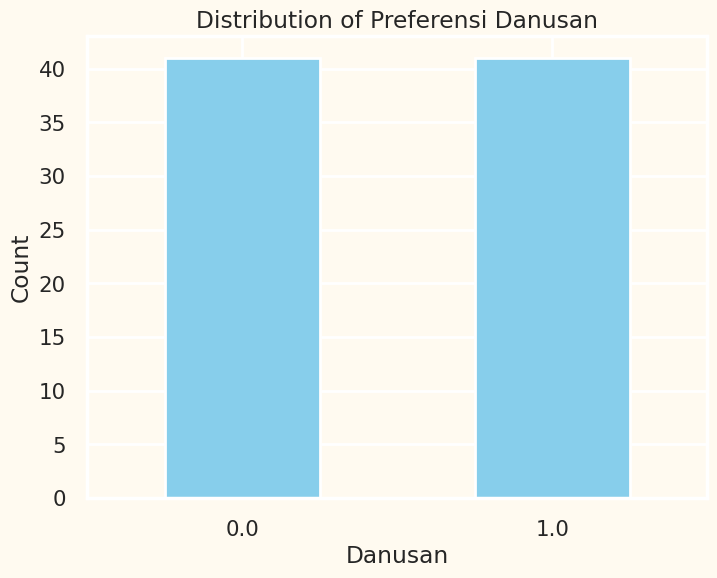

Danusan Counts:
Preferensi_Danusan
0.0    41
1.0    41
Name: count, dtype: int64


In [ ]:
danus_counts = y_train_smote.value_counts()

plt.figure(figsize=(8, 6))
danus_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Preferensi Danusan')
plt.xlabel('Danusan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Danusan Counts:")
print(danus_counts)

# Model

## Decision Tree

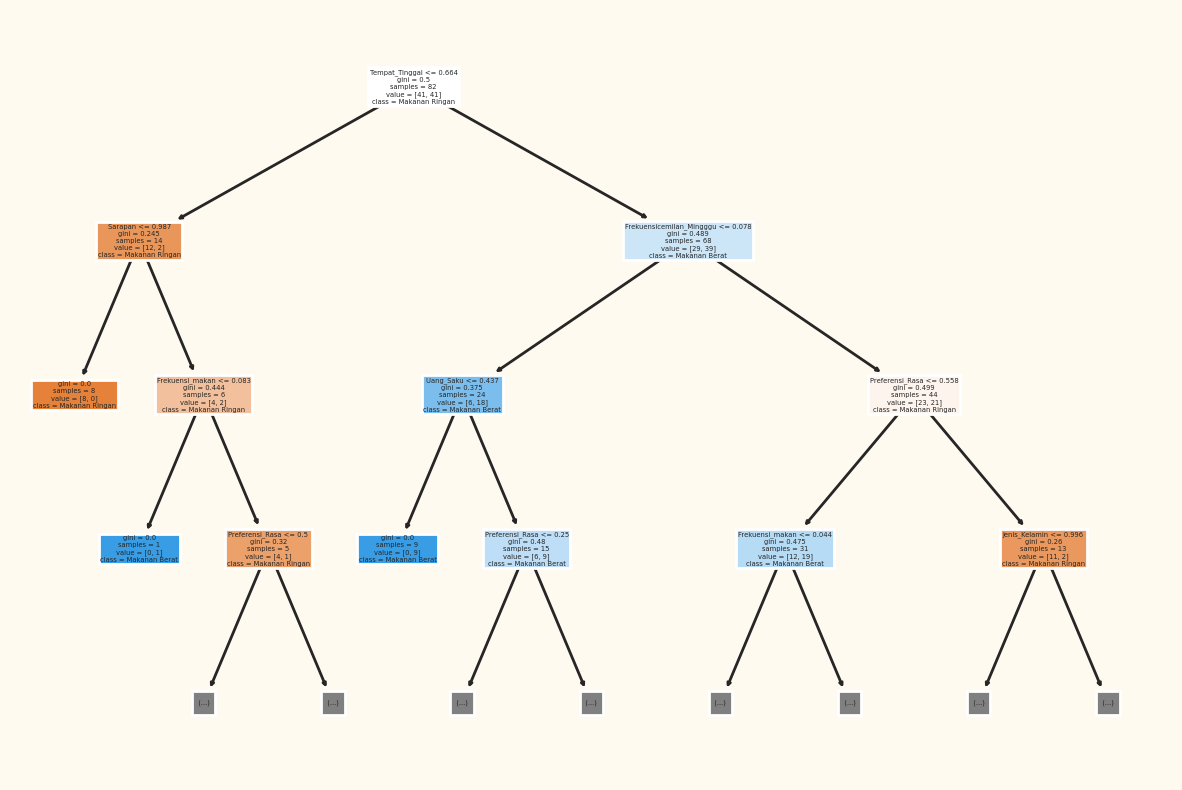

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


dt_classifier = DecisionTreeClassifier(random_state=2)
dt_classifier.fit(X_train_smote, y_train_smote)

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['Makanan Ringan', 'Makanan Berat'], max_depth=3)
plt.show()

In [ ]:
y_pred = dt_classifier.predict(X_test)
print([y_pred])

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

[array([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0.])]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.38      0.30      0.33        10
         1.0       0.63      0.71      0.67        17

    accuracy                           0.56        27
   macro avg       0.50      0.50      0.50        27
weighted avg       0.54      0.56      0.54        27


Confusion Matrix:
[[ 3  7]
 [ 5 12]]
Accuracy: 0.56


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid=parameter_grid, cv=5)

grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(best_params))

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best score: 0.6595588235294118
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'splitter': 'random'}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        10
         1.0       0.72      0.76      0.74        17

    accuracy                           0.67        27
   macro avg       0.64      0.63      0.63        27
weighted avg       0.66      0.67      0.66        27


Confusion Matrix:
[[ 5  5]
 [ 4 13]]
Accuracy: 0.67


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_classifier, X_train_smote, y_train_smote, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Rata-rata Cross Validation Score:", cv_scores.mean())

Cross Validation Scores: [0.41176471 0.41176471 0.5625     0.8125     0.625     ]
Rata-rata Cross Validation Score: 0.5647058823529412


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_smote, y_train_smote)

y_pred_svm1 = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm1)
print("Akurasi model SVM:", accuracy)

report_over = classification_report(y_test, y_pred_svm1)
print("Classification Report:")
print(report_over)

accuracy = accuracy_score(y_test, y_pred_svm1)
print("Akurasi dari model ini adalah:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm1))


Akurasi model SVM: 0.6296296296296297
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        10
         1.0       0.65      0.88      0.75        17

    accuracy                           0.63        27
   macro avg       0.58      0.54      0.52        27
weighted avg       0.60      0.63      0.58        27

Akurasi dari model ini adalah: 0.6296296296296297

Confusion Matrix:
[[ 2  8]
 [ 2 15]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100]}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5)


grid_search.fit(X_train_smote, y_train_smote)


best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']

print("Kernel terbaik:", best_kernel)
print("Nilai C terbaik:", best_C)

best_svm = SVC(kernel=best_kernel, C=best_C)

best_svm.fit(X_train_smote, y_train_smote)

y_pred_svm = best_svm.predict(X_test)

report_over = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(report_over)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

accuracy = accuracy_score(y_test, y_pred_svm)
print("Akurasi dari model ini adalah:", accuracy)


Kernel terbaik: rbf
Nilai C terbaik: 10
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.71      0.88      0.79        17

    accuracy                           0.70        27
   macro avg       0.69      0.64      0.64        27
weighted avg       0.70      0.70      0.68        27


Confusion Matrix:
[[ 4  6]
 [ 2 15]]
Akurasi dari model ini adalah: 0.7037037037037037


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


cv_scores = cross_val_score(svm_model, X_train_smote, y_train_smote, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Rata-rata Cross Validation Score:", cv_scores.mean())


Cross Validation Scores: [0.70588235 0.52941176 0.625      0.6875     0.8125    ]
Rata-rata Cross Validation Score: 0.6720588235294118


## KNN


### parameter default

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn_default = KNeighborsClassifier()

knn_default.fit(X_train_smote, y_train_smote)

y_pred_default = knn_default.predict(X_test)

print("Performance with default parameters:")
print(classification_report(y_test, y_pred_default))
print("Accuracy:", accuracy_score(y_test, y_pred_default))

Performance with default parameters:
              precision    recall  f1-score   support

         0.0       0.55      0.60      0.57        10
         1.0       0.75      0.71      0.73        17

    accuracy                           0.67        27
   macro avg       0.65      0.65      0.65        27
weighted avg       0.67      0.67      0.67        27

Accuracy: 0.6666666666666666


#### confusion matriks default parameter

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm_default = confusion_matrix(y_test, y_pred_default)
print("Confusion Matrix default parameter:")
print(cm_default)

TP_0 = cm_default[0, 0]
FP_0 = cm_default[0, 1]
FN_0 = cm_default[1, 0]

TP_1 = cm_default[1, 1]
FP_1 = cm_default[1, 0]
FN_1 = cm_default[0, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_default))

precision_0 = TP_0 / float(TP_0 + FP_0)
recall_0 = TP_0 / float(TP_0 + FN_0)
f1_score_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0)

precision_1 = TP_1 / float(TP_1 + FP_1)
recall_1 = TP_1 / float(TP_1 + FN_1)
f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)

print('Makanan Berat (Label 0) - Precision: {0:0.4f}, Recall: {1:0.4f}, F1-Score: {2:0.4f}'.format(precision_0, recall_0, f1_score_0))
print('Makanan Ringan (Label 1) - Precision: {0:0.4f}, Recall: {1:0.4f}, F1-Score: {2:0.4f}'.format(precision_1, recall_1, f1_score_1))

print(classification_report(y_test, y_pred_default))


Confusion Matrix default parameter:
[[ 6  4]
 [ 5 12]]
Accuracy: 0.6666666666666666
Makanan Berat (Label 0) - Precision: 0.6000, Recall: 0.5455, F1-Score: 0.5714
Makanan Ringan (Label 1) - Precision: 0.7059, Recall: 0.7500, F1-Score: 0.7273
              precision    recall  f1-score   support

         0.0       0.55      0.60      0.57        10
         1.0       0.75      0.71      0.73        17

    accuracy                           0.67        27
   macro avg       0.65      0.65      0.65        27
weighted avg       0.67      0.67      0.67        27



### parameter yang sudah di tunning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5)

grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
print(best_params)

best_knn = KNeighborsClassifier(**best_params)

best_knn.fit(X_train_smote, y_train_smote)

y_pred_tuned = best_knn.predict(X_test)

print("\nPerformance with tuned parameters:")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

cv_scores = cross_val_score(best_knn, X_train_smote, y_train_smote, cv=5)

print("\nCross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", cv_scores.mean())


{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

Performance with tuned parameters:
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.71      0.88      0.79        17

    accuracy                           0.70        27
   macro avg       0.69      0.64      0.64        27
weighted avg       0.70      0.70      0.68        27

Accuracy: 0.7037037037037037

Cross Validation Scores: [0.64705882 0.58823529 0.6875     0.8125     0.8125    ]
Mean Cross Validation Score: 0.7095588235294118


#### confusion matriks tuned parameter

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm_default = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix tuned parameter:")
print(cm_default)

TP_0 = cm_default[0, 0]
FP_0 = cm_default[0, 1]
FN_0 = cm_default[1, 0]

TP_1 = cm_default[1, 1]
FP_1 = cm_default[1, 0]
FN_1 = cm_default[0, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

precision_0 = TP_0 / float(TP_0 + FP_0)
recall_0 = TP_0 / float(TP_0 + FN_0)
f1_score_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0)

precision_1 = TP_1 / float(TP_1 + FP_1)
recall_1 = TP_1 / float(TP_1 + FN_1)
f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)

print('Makanan Berat (Label 0) - Precision: {0:0.4f}, Recall: {1:0.4f}, F1-Score: {2:0.4f}'.format(precision_0, recall_0, f1_score_0))
print('Makanan Ringan (Label 1) - Precision: {0:0.4f}, Recall: {1:0.4f}, F1-Score: {2:0.4f}'.format(precision_1, recall_1, f1_score_1))

print(classification_report(y_test, y_pred_tuned))


Confusion Matrix tuned parameter:
[[ 4  6]
 [ 2 15]]
Accuracy: 0.7037037037037037
Makanan Berat (Label 0) - Precision: 0.4000, Recall: 0.6667, F1-Score: 0.5000
Makanan Ringan (Label 1) - Precision: 0.8824, Recall: 0.7143, F1-Score: 0.7895
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.71      0.88      0.79        17

    accuracy                           0.70        27
   macro avg       0.69      0.64      0.64        27
weighted avg       0.70      0.70      0.68        27



##Feature Importance KNN

Frekuensi_makan: Importance = -0.0148, Std = 0.0296
Tempat_Tinggal: Importance = -0.0037, Std = 0.0349
Frekuensicemilan_Mingggu: Importance = 0.0000, Std = 0.0000
Diet: Importance = 0.0037, Std = 0.0111
Jenis_Kelamin: Importance = 0.0222, Std = 0.0444
Sarapan: Importance = 0.0444, Std = 0.0544
Preferensi_Rasa: Importance = 0.0556, Std = 0.0380
Umur: Importance = 0.0630, Std = 0.0525
Uang_Saku: Importance = 0.0667, Std = 0.0323
Beli_Diluar: Importance = 0.0815, Std = 0.0323
Pengaruh_Medsos: Importance = 0.1519, Std = 0.0672


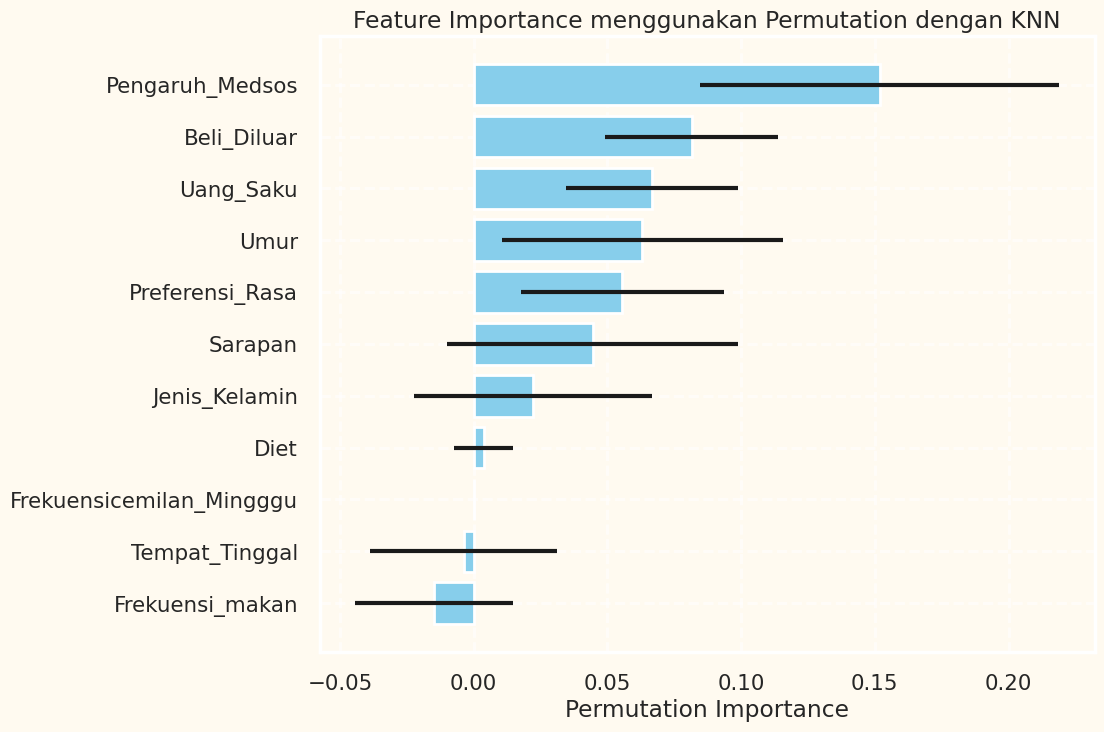

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

importances = result.importances_mean
std = result.importances_std

feature_names = X.columns

indices = np.argsort(importances)
sorted_importances = importances[indices]
sorted_std = std[indices]
sorted_feature_names = feature_names[indices]

for i in range(len(sorted_feature_names)):
    print(f"{sorted_feature_names[i]}: Importance = {sorted_importances[i]:.4f}, Std = {sorted_std[i]:.4f}")

plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_importances, xerr=sorted_std, color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance menggunakan Permutation dengan KNN")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
